### COVID-19
### UPDATE by Weeks 
#### started from officially Day 1 (Wednesday 22.01.2020) given in data set 
### Total infected cases, total fatalities, total recovered

In [1]:
from covid_byweek import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


### Number of covid-19 outbreak days 

In [2]:
rcParams['figure.figsize'] = 20, 6
len(x_dat)

410

In [3]:
updated_date=files[-1].split('.')[0]
updated_date

'03-06-2021'

### Total CONFIRMED cases in the World changed by week


Week: 1 with lowest confirmed cases 2113.0

Week: 47 with highest confirmed cases 5195647.0

Average confirmed by Week until now:  1974623.847457627


,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,59
Total Confirmed changed by Week,2113.0,16777.0,40074.0,70852.0,78275.0,87614.0,108753.0,166686.0,337155.0,720010.0,...,85212884.0,90318122.0,95076127.0,99217695.0,102967345.0,106162758.0,108877486.0,111406337.0,114109234.0,116502807.0
Number of Confirmed every Week,2113.0,14664.0,23297.0,30778.0,7423.0,9339.0,21139.0,57933.0,170469.0,382855.0,...,4333046.0,5105238.0,4758005.0,4141568.0,3749650.0,3195413.0,2714728.0,2528851.0,2702897.0,2393573.0


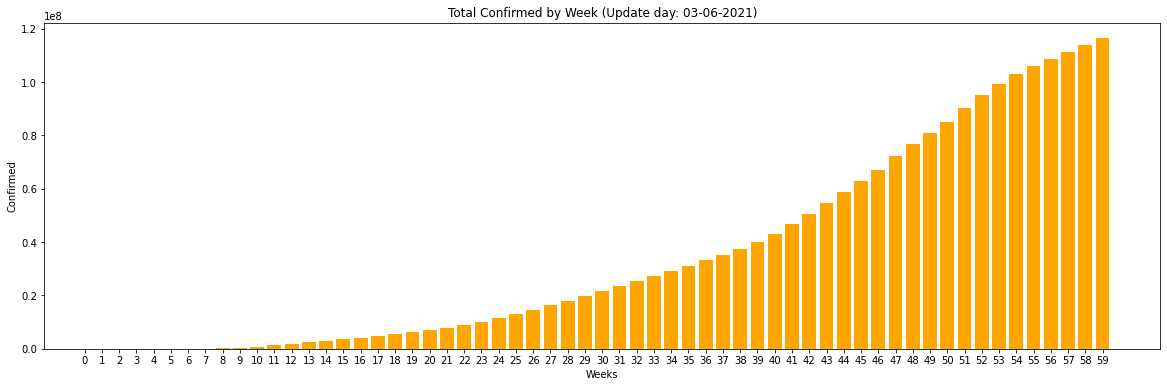

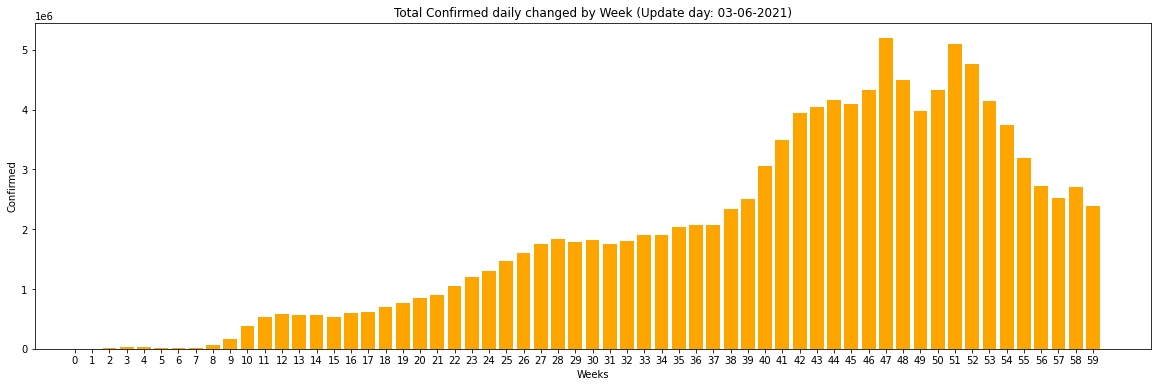

In [4]:
# convert to DataFrame
x_weeks = [week for week, value in confirmedByWeek]
y_cases_total = [value for week, value in confirmedByWeek]
y_cases_byweek = [confirmedByWeek[0][1]]+[confirmedByWeek[i+1][1]-confirmedByWeek[i][1] for i in range(len(confirmedByWeek)-1)]

weeks = np.arange(1, max(x_weeks)+1, 1)
confirmedweeks = pd.DataFrame(columns=x_weeks, index=['Total Confirmed changed by Week', 'Number of Confirmed every Week'])
for week in weeks:
    confirmedweeks[week] = [y_cases_total[week-1], y_cases_byweek[week-1]]

# Plot total confirmed
plt.figure(1)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases_total, color='Orange')
plt.xlabel('Weeks')
plt.ylabel('Confirmed')
plt.title("Total Confirmed by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalconfirmed.jpg')

# Plot number of confirmed every week
plt.figure(2)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases_byweek, color='Orange')
plt.xlabel('Weeks')
plt.ylabel('Confirmed')
plt.title("Total Confirmed daily changed by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalconfirmed_weekly.jpg')

print("\nWeek:", np.argmin(y_cases_byweek)+1, "with lowest confirmed cases", y_cases_byweek[np.argmin(y_cases_byweek)])
print("\nWeek:", np.argmax(y_cases_byweek)+1, "with highest confirmed cases", y_cases_byweek[np.argmax(y_cases_byweek)])
print("\nAverage confirmed by Week until now: ", np.mean(y_cases_byweek))
confirmedweeks

# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Total FATALITIES cases in the World changed by week


Week: 1 with lowest Fatalities cases 56.0

Week: 53 with highest Fatalities cases 98822.0

Average Fatalities by Week until now:  43864.016949152545


,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,59
Total Fatalities changed by Week,56.0,362.0,906.0,1770.0,2469.0,2996.0,3803.0,6440.0,14630.0,33989.0,...,1850081.0,1941752.0,2038180.0,2137002.0,2235185.0,2322930.0,2402155.0,2467895.0,2531755.0,2587977.0
Number of Fatalities every Week,56.0,306.0,544.0,864.0,699.0,527.0,807.0,2637.0,8190.0,19359.0,...,78721.0,91671.0,96428.0,98822.0,98183.0,87745.0,79225.0,65740.0,63860.0,56222.0


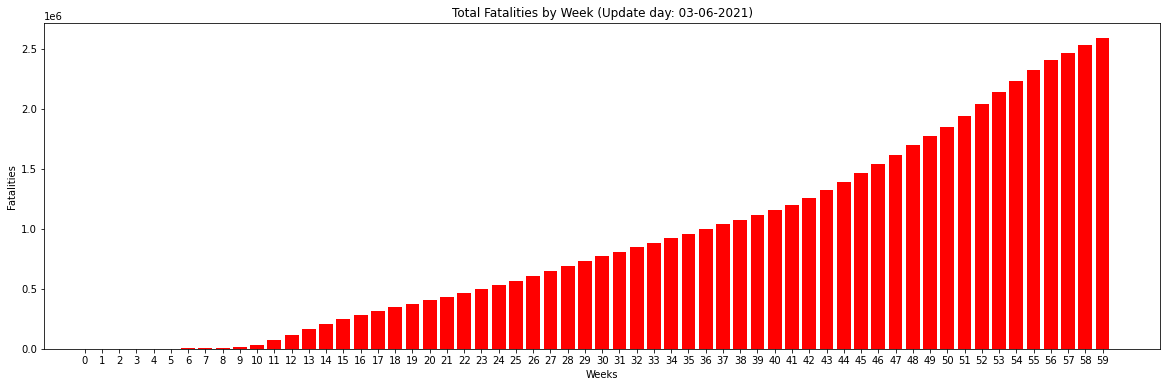

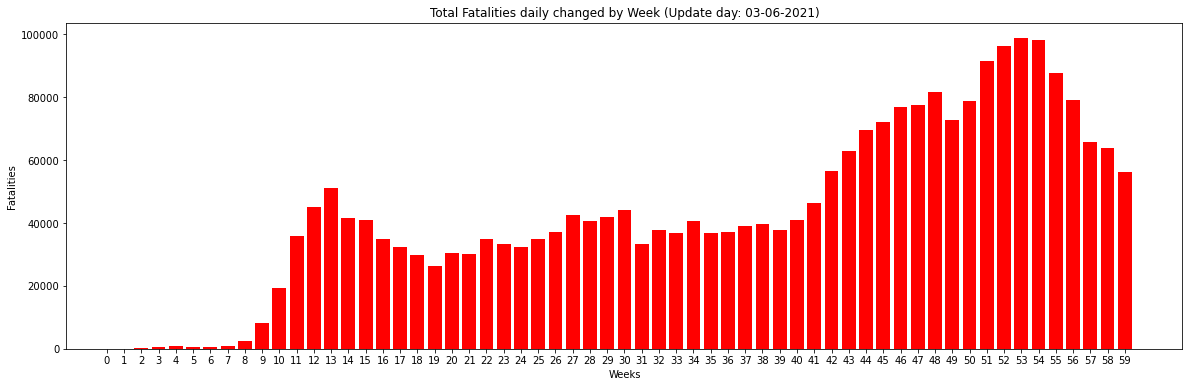

In [5]:
# convert to DataFrame
x_weeks = [week for week, value in deathsByWeek]
y_cases_total_deaths = [value for week, value in deathsByWeek]
y_cases_byweek_deaths = [deathsByWeek[0][1]]+[deathsByWeek[i+1][1]-deathsByWeek[i][1] for i in range(len(deathsByWeek)-1)]

weeks = np.arange(1, max(x_weeks)+1, 1)
confirmedweeks_deaths = pd.DataFrame(columns=x_weeks, index=['Total Fatalities changed by Week', 'Number of Fatalities every Week'])
for week in weeks:
    confirmedweeks_deaths[week] = [y_cases_total_deaths[week-1], y_cases_byweek_deaths[week-1]]

# Plot total confirmed
plt.figure(1)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases_total_deaths, color='Red')
plt.xlabel('Weeks')
plt.ylabel('Fatalities')
plt.title("Total Fatalities by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalfatalities.jpg')

# Plot number of confirmed every week
plt.figure(2)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases_byweek_deaths, color='Red')
plt.xlabel('Weeks')
plt.ylabel('Fatalities')
plt.title("Total Fatalities daily changed by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalfatalities_weekly.jpg')

print("\nWeek:", np.argmin(y_cases_byweek_deaths)+1, "with lowest Fatalities cases", y_cases_byweek_deaths[np.argmin(y_cases_byweek_deaths)])
print("\nWeek:", np.argmax(y_cases_byweek_deaths)+1, "with highest Fatalities cases", y_cases_byweek_deaths[np.argmax(y_cases_byweek_deaths)])
print("\nAverage Fatalities by Week until now: ", np.mean(y_cases_byweek_deaths))
confirmedweeks_deaths

# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Total RECOVERED cases in the World changed by week


Week: 1 with lowest Recovered cases 56.0

Week: 47 with highest Recovered cases 4149818.0

Average Recovered by Week until now:  1300478.1186440678


,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,59
Total Recovered changed by Week,56.0,476.0,3245,10866,23394,42717,60695,76033,97225,149062,...,56018409.0,58832223.0,61755189.0,64752673.0,67665310.0,70342973.0,72700356.0,74859907.0,75136334.0,76728209.0
Number of Recovered every Week,56.0,420.0,2769,7621,12528,19323,17978,15338,21192,51837,...,2770275.0,2813814.0,2922966.0,2997484.0,2912637.0,2677663.0,2357383.0,2159551.0,276427.0,1591875.0


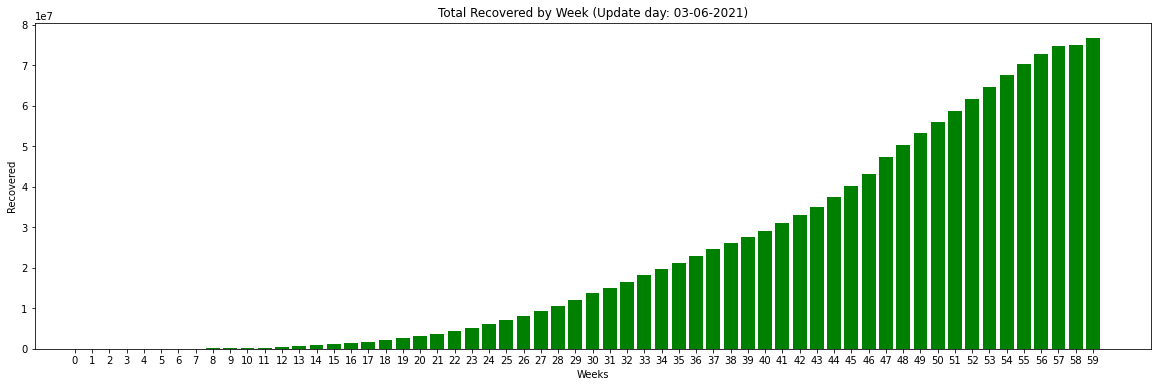

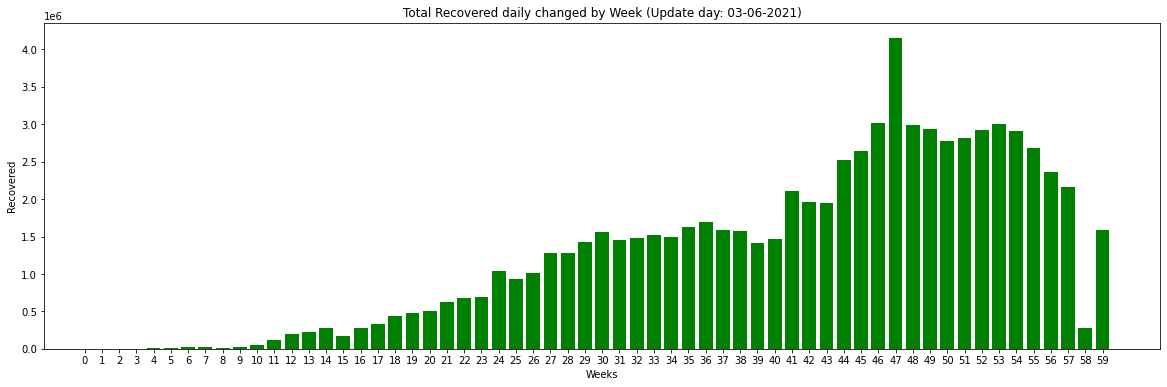

In [6]:
# convert to DataFrame
x_weeks = [week for week, value in recoveredByWeek]
y_cases_total_recovered = [value for week, value in recoveredByWeek]
y_cases_byweek_recovered = [recoveredByWeek[0][1]]+[recoveredByWeek[i+1][1]-recoveredByWeek[i][1] for i in range(len(recoveredByWeek)-1)]

weeks = np.arange(1, max(x_weeks)+1, 1)
confirmedweeks_recovered = pd.DataFrame(columns=x_weeks, index=['Total Recovered changed by Week', 'Number of Recovered every Week'])
for week in weeks:
    confirmedweeks_recovered[week] = [y_cases_total_recovered[week-1], y_cases_byweek_recovered[week-1]]

# Plot total recovered
plt.figure(1)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases_total_recovered, color='Green')
plt.xlabel('Weeks')
plt.ylabel('Recovered')
plt.title("Total Recovered by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalrecovered.jpg')

# Plot number of recovered every week
plt.figure(2)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
plt.bar(x_weeks, y_cases_byweek_recovered, color='Green')
plt.xlabel('Weeks')
plt.ylabel('Recovered')
plt.title("Total Recovered daily changed by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalrecovered_weekly.jpg')

print("\nWeek:", np.argmin(y_cases_byweek_recovered)+1, "with lowest Recovered cases", y_cases_byweek_recovered[np.argmin(y_cases_byweek_recovered)])
print("\nWeek:", np.argmax(y_cases_byweek_recovered)+1, "with highest Recovered cases", y_cases_byweek_recovered[np.argmax(y_cases_byweek_recovered)])
print("\nAverage Recovered by Week until now: ", np.mean(y_cases_byweek_recovered))
confirmedweeks_recovered

# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1